# This is a Kaggle Notebook since I required a GPU for training YOLO V8 object detection.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img2.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img1_43_nosy.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img5.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img3.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img4.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img6.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img1.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/ScrewAndBolt_20240713/20240713_194200.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/ScrewAndBolt_20240713/20240713_193659.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/ScrewAndBolt_20240713/20240713_194541.jpg
/kaggle/input/screws/CountingChallenge/CountingChallenge/ScrewAndBolt_20240713/20240713_193839.jpg
/kaggle/

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.6/862.6 kB 18.8 MB/s eta 0:00:0000:01


In [3]:
import torch
from ultralytics import YOLO
torch.cuda.is_available()


True

Loading yolov8 nano model and training for 100 epochs on the available images.

In [5]:
model = YOLO('yolov8n.pt')
model.train(data = '/kaggle/input/screws/Screw detector.v2i.yolov8/data.yaml', epochs = 100)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/screws/Screw detector.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

wandb: Currently logged in as: satyakibhattacharjee252 (satyakibhattacharjee252-none). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/screws/Screw detector.v2i.yolov8/train/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 706.34it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/screws/Screw detector.v2i.yolov8/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 147, len(boxes) = 531. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/screws/Screw detector.v2i.yolov8/valid/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 1251.28it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/screws/Screw detector.v2i.yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.58G      2.068      3.512       1.38        252        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all          1         43     0.0633      0.442     0.0477     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.28G      2.021      3.482      1.348        231        640: 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          1         43       0.06      0.419     0.0459     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.33G      1.822      3.454       1.22        248        640: 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.74it/s]

                   all          1         43       0.08      0.558      0.071     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.28G      1.829      3.154       1.22        178        640: 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.94it/s]

                   all          1         43       0.13      0.907      0.163     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.32G      1.644      2.721      1.117        143        640: 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.61it/s]

                   all          1         43       0.14      0.977      0.242      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.48G      1.761      2.254      1.128        117        640: 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.06it/s]

                   all          1         43       0.14      0.977      0.294      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.39G      1.798      1.929      1.148        178        640: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.39it/s]

                   all          1         43       0.14      0.977       0.37      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.31G      2.004      1.554      1.231        235        640: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.89it/s]

                   all          1         43      0.123       0.86      0.595      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.31G      1.874      1.281      1.164        164        640: 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.87it/s]

                   all          1         43      0.113      0.791      0.493      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.37G      1.768      1.269       1.12        149        640: 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.54it/s]

                   all          1         43      0.103      0.721      0.458      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G       1.77       1.26      1.148        133        640: 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.86it/s]

                   all          1         43     0.0767      0.535      0.329     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.3G       2.07      1.563      1.486         87        640: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.45it/s]

                   all          1         43     0.0835      0.186     0.0851     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.6G      1.668      1.173      1.158        167        640: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.97it/s]

                   all          1         43      0.194      0.163     0.0766      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.41G      1.788       1.25      1.181        163        640: 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.90it/s]

                   all          1         43       0.25      0.209       0.11     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.33G      1.617      1.193      1.203        189        640: 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.83it/s]

                   all          1         43      0.281      0.279      0.167     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.24G      1.735      1.175       1.22        184        640: 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.00it/s]

                   all          1         43      0.314      0.349      0.281     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.25G      1.786      1.155       1.21        209        640: 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.13it/s]

                   all          1         43      0.534      0.698      0.491      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.39G      1.711      1.134      1.184        172        640: 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.07it/s]

                   all          1         43      0.515      0.884      0.716      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.52G      1.714      1.232      1.186        150        640: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.02it/s]

                   all          1         43      0.542      0.953       0.89      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.34G      1.712      1.671      1.272         67        640: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.01it/s]

                   all          1         43      0.567          1      0.971      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.4G      1.663      1.301      1.175        167        640: 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.27it/s]

                   all          1         43      0.705      0.977      0.928      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.43G      1.774      1.084      1.174        158        640: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.22it/s]

                   all          1         43      0.893          1      0.992      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.32G      1.656      1.174       1.26         93        640: 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.70it/s]

                   all          1         43          1      0.974      0.995      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.22G      1.786       1.24      1.323        175        640: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.98it/s]

                   all          1         43          1      0.908      0.995      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.31G      1.608      1.027      1.169        158        640: 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.71it/s]

                   all          1         43          1       0.89      0.995      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.55G      1.754      1.079      1.198        169        640: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.89it/s]

                   all          1         43          1      0.906      0.995      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.34G      1.659      1.131      1.161        199        640: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.08it/s]

                   all          1         43      0.979      0.977      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.49G       1.63      1.099      1.195        121        640: 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.60it/s]

                   all          1         43      0.979      0.977      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.46G      1.761      1.115      1.244        226        640: 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.74it/s]

                   all          1         43      0.997          1      0.995       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.38G      1.654      1.024      1.158        213        640: 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.57it/s]

                   all          1         43      0.948          1      0.993      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.31G      1.561       1.02      1.144        234        640: 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.57it/s]

                   all          1         43      0.948          1      0.993      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.44G      1.637      1.056      1.135        219        640: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.58it/s]

                   all          1         43      0.916          1       0.98      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.28G      1.523     0.9681      1.112        189        640: 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.67it/s]

                   all          1         43      0.937      0.977      0.991      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.23G      1.579     0.9517      1.135        155        640: 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.91it/s]

                   all          1         43      0.937      0.977      0.991      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.42G      1.489     0.9282      1.106        135        640: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.57it/s]

                   all          1         43      0.983      0.977      0.994      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.43G      1.674     0.9914      1.169        146        640: 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.07it/s]

                   all          1         43      0.934      0.981      0.993      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.24G      1.686     0.9689       1.15        194        640: 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.89it/s]

                   all          1         43      0.934      0.981      0.993      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.51G      1.577     0.9893       1.15        190        640: 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.31it/s]

                   all          1         43       0.84       0.93      0.892      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.32G      1.606     0.9244      1.115        183        640: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.69it/s]

                   all          1         43      0.442      0.791      0.578      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.28G      1.498      1.021      1.145        153        640: 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.96it/s]

                   all          1         43      0.442      0.791      0.578      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.55G      1.803      1.051      1.189        222        640: 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.65it/s]

                   all          1         43        0.4      0.721      0.466      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.42G      1.619      1.064      1.128        267        640: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.87it/s]

                   all          1         43      0.619      0.814      0.708      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.44G      1.548      1.031      1.123        192        640: 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.66it/s]

                   all          1         43      0.619      0.814      0.708      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.23G      1.537      1.112      1.151        318        640: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.82it/s]

                   all          1         43      0.941      0.953      0.954      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.31G      1.596     0.9916      1.112        281        640: 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.45it/s]

                   all          1         43      0.941      0.953      0.954      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.29G      1.581      1.117      1.169        141        640: 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.03it/s]

                   all          1         43      0.929          1      0.983      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.29G      1.537     0.9849      1.183        138        640: 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.13it/s]

                   all          1         43      0.929          1      0.983      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G      1.624     0.9293      1.137        176        640: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.63it/s]

                   all          1         43      0.948          1      0.988      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.47G      1.531     0.9187      1.092        201        640: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.67it/s]

                   all          1         43      0.948          1      0.988      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.39G       1.49     0.9211      1.096        207        640: 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.78it/s]

                   all          1         43      0.961          1      0.975      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.33G      1.552      0.912      1.105        186        640: 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.71it/s]

                   all          1         43      0.961          1      0.975      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.39G      1.504     0.9167      1.116        183        640: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.54it/s]

                   all          1         43      0.969          1      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.25G       1.55     0.9329      1.121        152        640: 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.85it/s]

                   all          1         43      0.969          1      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.32G      1.475     0.9276      1.156        141        640: 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.00it/s]

                   all          1         43      0.995          1      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.23G      1.609      1.024      1.188        134        640: 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]

                   all          1         43      0.995          1      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G      1.573     0.9844      1.217        157        640: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.96it/s]

                   all          1         43          1      0.991      0.995      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.35G       1.56     0.9469      1.103        276        640: 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.73it/s]

                   all          1         43          1      0.991      0.995      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.33G      1.471     0.9005      1.121        239        640: 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.11it/s]


                   all          1         43          1      0.991      0.995      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.34G      1.575       0.93      1.112        266        640: 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.99it/s]

                   all          1         43          1      0.991      0.995      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.4G      1.536     0.9079      1.146        139        640: 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.71it/s]

                   all          1         43      0.977      0.986      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.39G      1.551     0.9367      1.135        267        640: 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.79it/s]

                   all          1         43      0.977      0.986      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.45G       1.48     0.9575      1.141        114        640: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.05it/s]

                   all          1         43          1      0.998      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.33G      1.432      1.077       1.08         94        640: 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.87it/s]

                   all          1         43          1      0.998      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.49G      1.527      1.336      1.202         62        640: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.10it/s]

                   all          1         43      0.997          1      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.45G      1.479     0.9042       1.04        344        640: 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.98it/s]

                   all          1         43      0.997          1      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.3G      1.517          1      1.166        174        640: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.24it/s]


                   all          1         43      0.995          1      0.995      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.28G      1.552     0.8851      1.057        314        640: 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.80it/s]

                   all          1         43      0.995          1      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.31G      1.461     0.9022      1.124        121        640: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.95it/s]

                   all          1         43      0.995          1      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.28G      1.453     0.8934      1.129        151        640: 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.13it/s]

                   all          1         43      0.995          1      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.29G      1.468     0.8829      1.078        178        640: 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.22it/s]

                   all          1         43      0.991          1      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.31G      1.459     0.8506        1.1        194        640: 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.17it/s]

                   all          1         43      0.991          1      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G      1.477      0.897      1.115        124        640: 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.24it/s]

                   all          1         43       0.99          1      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.27G      1.542     0.8579      1.088        216        640: 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.10it/s]

                   all          1         43       0.99          1      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.39G      1.465     0.8573      1.124        121        640: 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.23it/s]

                   all          1         43      0.997          1      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.36G        1.4     0.9214      1.127         77        640: 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.49it/s]

                   all          1         43      0.997          1      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.33G      1.573     0.8851      1.104        138        640: 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.18it/s]

                   all          1         43      0.996          1      0.995      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.37G      1.369     0.8288      1.041        239        640: 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.66it/s]

                   all          1         43      0.996          1      0.995      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G      1.477     0.8845      1.117        172        640: 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.13it/s]

                   all          1         43          1      0.999      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.26G       1.39     0.8834      1.106        120        640: 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all          1         43          1      0.999      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.38G      1.514     0.8648      1.122        133        640: 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.65it/s]


                   all          1         43          1      0.997      0.995      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.28G      1.431     0.8252      1.062        185        640: 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.26it/s]

                   all          1         43          1      0.997      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.23G      1.407     0.8249      1.076        162        640: 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.56it/s]

                   all          1         43          1      0.999      0.995      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.41G      1.465     0.8666      1.165        115        640: 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.44it/s]

                   all          1         43          1      0.999      0.995      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.39G      1.336     0.7872      1.055        177        640: 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.60it/s]

                   all          1         43      0.999          1      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.45G      1.535     0.8531      1.078        258        640: 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.00it/s]

                   all          1         43      0.999          1      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.24G      1.632     0.9681      1.282        127        640: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.19it/s]

                   all          1         43      0.999          1      0.995      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.26G      1.406     0.8944      1.142        107        640: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.89it/s]

                   all          1         43      0.999          1      0.995      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.38G      1.512     0.8203      1.104        199        640: 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.44it/s]

                   all          1         43      0.998          1      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.47G      1.434       0.82      1.059        124        640: 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.14it/s]

                   all          1         43      0.998          1      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.29G      1.394     0.8225      1.129        121        640: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.13it/s]

                   all          1         43      0.998          1      0.995      0.671


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.28G      1.444     0.8726      1.141        174        640: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all          1         43      0.998          1      0.995      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.28G       1.43     0.9507      1.168         80        640: 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]

                   all          1         43      0.998          1      0.995      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.28G      1.424      0.847      1.139        116        640: 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.02it/s]

                   all          1         43      0.998          1      0.995      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.28G       1.46     0.9348      1.154         74        640: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.66it/s]

                   all          1         43      0.998          1      0.995      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.28G      1.409     0.9289      1.193         74        640: 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.94it/s]

                   all          1         43      0.998          1      0.995      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.29G      1.423     0.8613      1.097        108        640: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.51it/s]

                   all          1         43      0.997          1      0.995      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.28G       1.41     0.8439      1.117        180        640: 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.76it/s]

                   all          1         43      0.997          1      0.995      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.29G       1.43     0.8613      1.106         91        640: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.84it/s]

                   all          1         43      0.997          1      0.995      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.28G      1.386     0.9421      1.198        108        640: 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.89it/s]

                   all          1         43      0.997          1      0.995      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.29G      1.387     0.8234      1.028         92        640: 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.57it/s]

                   all          1         43      0.997          1      0.995      0.649



100 epochs completed in 0.041 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 34.48it/s]


                   all          1         43          1      0.999      0.995      0.683
Speed: 1.0ms preprocess, 12.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,▁▂▂▃▄▄▅▅▅▆▆▇▇▇▇███████▇▇▇▆▆▅▅▅▄▄▄▃▃▃▂▂▂▁
lr/pg1,▁▂▂▃▄▄▅▅▅▆▆▇▇▇▇███████▇▇▇▆▆▅▅▅▄▄▄▃▃▃▂▂▂▁
lr/pg2,▁▂▂▃▄▄▅▅▅▆▆▇▇▇▇███████▇▇▇▆▆▅▅▅▄▄▄▃▃▃▂▂▂▁
metrics/mAP50(B),▁▁▃▅▃▁▃▆███████▅▄███████████████████████
metrics/mAP50-95(B),▁▁▃▃▁▁▂▃▅▆▇▇▇▇▇▃▂▆▇▇▇▇▆▇▇███████████████
metrics/precision(B),▁▁▂▁▁▂▃▄▆██████▄▄█▇█████████████████████
metrics/recall(B),▃▄█▇▄▁▃▇██▇████▆▆███████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▇▅▄▅▅▄▄▅▄▃▃▄▄▅▃▃▃▃▂▃▃▃▃▃▂▂▂▁▂▂▁▂▂▂▂▂▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac3ea891d80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Now I am loading the weights of the trained model to test it.

In [24]:
model_test = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')
detections = model_test.predict('/kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img1.jpg', save = True)


image 1/1 /kaggle/input/screws/CountingChallenge/CountingChallenge/Screws_2024_07_15/img1.jpg: 480x640 43 Screwss, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


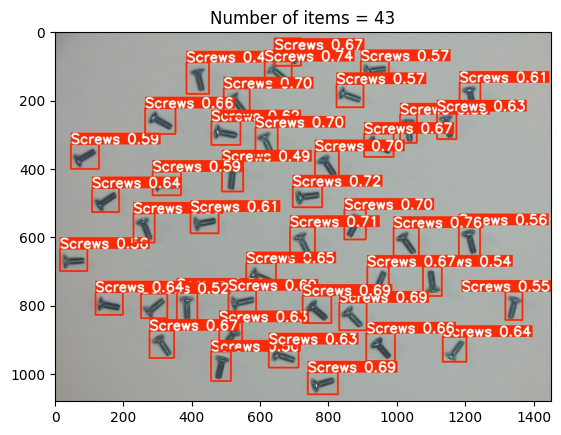

In [27]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/kaggle/working/runs/detect/train2/runs/detect/predict2/img1.jpg')
plt.imshow(img)
plt.title(f'Number of items = {len(detections[0].boxes)}')
plt.show()